# Analisando a Violência no Rio de Janeiro


Além da belezas naturais e atrações turísticas mundialmente conhecidas, o município do Rio de Janeiro (RJ) é conhecido também pelo seu alto índice de criminalidade - um dos maiores do Brasil. O alto índice assusta o governo e os cidadãos, pois põe em risco a integridade física dos indivíduos, resulta em perdas de patrimônios, e causa danos ao bem estar da população no geral, impondo uma série de danos à sociedade.  

Consta no [Atlas de Violência de 2019](https://www.ipea.gov.br/portal/images/stories/PDFs/relatorio_institucional/190605_atlas_da_violencia_2019.pdf), que em 2016 houve uma perda de 373 bilhões de reais para o Brasil - 5,9% do PIB -, gerados pelos custos com a criminalidade. Criminalidade que afeta tanto a atividade turística, quanto a entrada de novos investimentos, resultando também na perda de investimentos já existentes.

Esse relatório é produzido com base nos dados do portal ISPDados, disponibilizado pelo governo do Rio de Janeiro. As variáveis fornecidas são exploradas e a análise é realizada em cima dos indicadores estatísticos.

## Obtenção dos Dados


Os dados utilizados para a realização desse relatório foram obtidos no site do [Instituto de Segurança Pública](http://www.ispdados.rj.gov.br/) (ISP) do Estado do Rio de Janeiro.

Os datasets fornecidos no portal são obtidos por meio dos Registros de Ocorrência (RO) realizados na delegacias de Polícia Civil, e algumas outras informações são obtidas da Polícia Militar, ambas do Estado do Rio de Janeiro.

A Corregedoria Interna da Polícia Civil (COINPOL) faz uma análise dos Registros de Ocorrência submetidos, antes de os inserirem nos dados do ISP, para garantia do controle de qualidade. A análise estatistica é gerada com base nas datas dos Registros de Ocorrência.


O arquivo ```csv``` utilizado pode ser obtido neste [link](https://http://www.ispdados.rj.gov.br/estatistica.html).


### Importando os dados

In [37]:
#importando as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv")

## Análise Inicial dos Dados

Verificação das dimensões do DataSet.


In [39]:
#tamanho do DataFrame

print(f"Número de entradas: {df.shape[0]}")
print(f"Número de variáveis: {df.shape[1]}")

Número de entradas: 344
Número de variáveis: 56


In [40]:
#nomes das variáveis

df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

In [41]:
#tipos das variáveis

df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

In [42]:
#primeiras linhas

df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


In [43]:
df.tail()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
339,2019,4,360,1.0,11,124.0,466,5573,483.0,172.0,2182.0,502,124,3755,667,7031,1585,2,4.0,2424.0,10.0,82.0,23.0,2245,18454,1244,1519,607.0,1318.0,211.0,7633,12532,0.0,151.0,11.0,3260.0,1909,745.0,1021.0,187.0,2624,3128.0,497.0,1648.0,350.0,5310.0,408.0,22,3.0,1.0,0.0,496,11040,3755,67797.0,3
340,2019,5,345,2.0,15,172.0,478,4958,465.0,145.0,2304.0,514,93,3649,710,7332,1625,1,3.0,2427.0,9.0,87.0,7.0,2216,18673,1480,1475,715.0,1423.0,220.0,7711,13024,0.0,147.0,7.0,3498.0,2034,735.0,1133.0,199.0,2450,3169.0,527.0,1771.0,248.0,5068.0,390.0,20,1.0,0.0,0.0,534,11384,3649,68336.0,3
341,2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,2481.0,382,85,3115,599,6077,1287,1,4.0,2187.0,19.0,83.0,9.0,1984,15832,1251,1443,630.0,1345.0,189.0,7224,12082,0.0,133.0,6.0,3029.0,1854,763.0,976.0,158.0,2041,2848.0,467.0,1585.0,233.0,4497.0,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3
342,2019,7,309,5.0,10,194.0,399,4740,402.0,140.0,2334.0,386,72,3198,691,6637,1208,1,0.0,2226.0,12.0,97.0,16.0,2110,16654,1353,1570,746.0,1391.0,230.0,7632,12922,0.0,135.0,12.0,3627.0,1861,709.0,996.0,187.0,2355,2907.0,490.0,1856.0,267.0,4678.0,400.0,32,7.0,0.0,0.0,518,10071,3198,65817.0,2
343,2019,8,318,1.0,6,170.0,457,4760,460.0,156.0,2437.0,433,103,3181,587,6452,1215,1,1.0,2245.0,9.0,98.0,17.0,1794,16136,1361,1568,674.0,1534.0,185.0,7280,12602,0.0,132.0,12.0,3546.0,1862,668.0,1067.0,171.0,2081,3114.0,476.0,2028.0,265.0,4662.0,367.0,27,8.0,2.0,0.0,495,9912,3181,65285.0,2


Algumas variáveis apresentam dados ausentes, e isso pode ser explicado por conta do intervalo de tempo entre o ínicio e o fim dos dados - que vai do ano de 1991 a 2019.

Os dados ausentes nos anos iniciais não implicam na ausência de tais crimes no período, mas sim que esses crimes podem não ter sido contabilizados pelo órgão responsável por coletar os dados na época. 

É verificada a proporção desses dados ausentes em relação ao dataset e feita a análise do que será realizado em relação a eles.

In [44]:
#valores ausentes

(df.isnull().sum()/df.shape[0]).sort_values(ascending=False) *100

roubo_bicicleta               80.232558
furto_bicicleta               80.232558
apreensao_drogas_sem_autor    52.325581
posse_drogas                  52.325581
apf                           52.325581
aaapai                        52.325581
cmp                           52.325581
trafico_drogas                52.325581
cmba                          52.325581
sequestro_relampago           41.860465
furto_coletivo                41.860465
extorsao                      41.860465
furto_celular                 41.860465
roubo_apos_saque              41.860465
roubo_conducao_saque          41.860465
roubo_cx_eletronico           41.860465
estupro                       41.860465
estelionato                   41.860465
pol_civis_mortos_serv         41.860465
pol_militares_mortos_serv     41.860465
pessoas_desaparecidas         38.372093
encontro_ossada               38.372093
roubo_celular                 31.395349
lesao_corp_culposa            27.906977
ameaca                        27.906977


É possível notar acima que existe grande quantidade de valores ausentes em algumas variáveis, como crimes relacionados a apreensão de drogas e roubo e furto de bicicletas, por exemplo.

Uma forma coerente de analisar esses dados é utilizá-los desde a data que eles começaram a ser registrados, pois a maioria dos dados faltantes está concentrado nos anos de início do dataset. 

Os crimes também podem ser analisados por ano, por mês ou por categoria - crimes contra a vida, crimes contra o patrimônio, etc.

Nesta análise, é selecionada a parte do dataset referente aos últimos 10 anos, para melhor interpretação.


In [45]:
#selecionando as entradas referentes aos ultimos 10 anos (2009 - 2019)

indice = df[(df.vano == 2009) & (df.mes == 9 )].index[0]

df_ultimosanos = df[indice:]

df_ultimosanos.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
224,2009,9,433,3.0,18,82.0,365,6678,330.0,203.0,3534.0,424,147,1728,217,5354,660,3,3.0,687.0,14.0,151.0,NaN,903,10291,1619,2242,746.0,1914.0,NaN,7506,14027,2.0,100.0,6.0,1918.0,1052,354.0,519.0,207.0,1515,1826.0,369.0,1120.0,48.0,5956.0,442.0,37,5.0,2.0,0.0,536,6701,1728,54919.0,3
225,2009,10,419,1.0,21,93.0,316,6452,363.0,175.0,3584.0,396,146,1758,187,5247,676,3,4.0,701.0,13.0,149.0,NaN,923,10203,1680,2438,693.0,1762.0,NaN,7155,13728,0.0,85.0,7.0,1812.0,1005,359.0,482.0,194.0,1466,1804.0,382.0,885.0,38.0,5947.0,427.0,40,4.0,3.0,0.0,534,6624,1758,53531.0,3
226,2009,11,438,4.0,13,76.0,346,7857,230.0,219.0,3720.0,383,145,1688,224,5336,625,3,2.0,636.0,8.0,184.0,NaN,930,10164,1576,2431,738.0,1920.0,NaN,7375,14040,1.0,95.0,6.0,1752.0,922,308.0,454.0,172.0,1423,1705.0,325.0,884.0,58.0,6688.0,455.0,44,4.0,0.0,0.0,531,6597,1688,56000.0,3
227,2009,12,476,10.0,25,74.0,333,7137,329.0,187.0,3772.0,385,150,1830,269,5247,593,2,1.0,621.0,10.0,152.0,NaN,1037,10297,1723,2661,761.0,1796.0,NaN,7898,14839,2.0,77.0,6.0,1697.0,928,308.0,485.0,156.0,1538,1724.0,316.0,795.0,29.0,6009.0,546.0,49,0.0,2.0,0.0,585,6461,1830,55145.0,3
228,2010,1,447,6.0,19,77.0,377,7716,345.0,161.0,3511.0,373,123,1945,234,5292,568,1,4.0,622.0,10.0,139.0,NaN,1036,10347,1683,2618,704.0,1768.0,NaN,8077,14850,2.0,89.0,5.0,1716.0,891,301.0,466.0,143.0,1497,1763.0,385.0,695.0,43.0,6868.0,481.0,69,2.0,3.0,3.0,549,6482,1945,56534.0,3


In [46]:
#valores ausentes dos últimos 10 anos

(df_ultimosanos.isnull().sum()/df_ultimosanos.shape[0]).sort_values(ascending=False) *100

furto_bicicleta               43.333333
roubo_bicicleta               43.333333
fase                           0.000000
furto_transeunte               0.000000
total_roubos                   0.000000
outros_roubos                  0.000000
roubo_apos_saque               0.000000
roubo_conducao_saque           0.000000
roubo_celular                  0.000000
roubo_cx_eletronico            0.000000
roubo_banco                    0.000000
roubo_em_coletivo              0.000000
roubo_transeunte               0.000000
roubo_carga                    0.000000
roubo_veiculo                  0.000000
roubo_residencia               0.000000
roubo_comercio                 0.000000
lesao_corp_culposa             0.000000
hom_culposo                    0.000000
estupro                        0.000000
lesao_corp_dolosa              0.000000
tentat_hom                     0.000000
hom_por_interv_policial        0.000000
latrocinio                     0.000000
lesao_corp_morte               0.000000


Mesmo após a seleção das entradas referentes aos últimos 10 anos do dataset, uma parte dele, referente a furto e roubo de bicicletas, ainda continuam nulos. É aplicada então uma função para verificar o momento de início de registro desses dados.

In [47]:
df_inicio = df[~df.roubo_bicicleta.isna()]

df_inicio.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
276,2014,1,464,3.0,15,50.0,557,9050,555.0,194.0,4064.0,774,126,3206,489,6625,662,6,4.0,473.0,9.0,121.0,0.0,1275,13770,1638,3268,938.0,1538.0,0.0,9880,17262,0.0,178.0,31.0,3017.0,2356,1160.0,1012.0,219.0,2342,3095.0,1091.0,1494.0,47.0,9034.0,628.0,66,3.0,0.0,0.0,532,7760,3206,75403.0,3
277,2014,2,482,5.0,16,56.0,543,8093,555.0,166.0,3787.0,728,140,3025,418,6555,621,4,5.0,461.0,14.0,123.0,0.0,1167,13261,1484,3274,940.0,1349.0,0.0,8809,15856,0.0,154.0,18.0,2873.0,2126,904.0,1021.0,234.0,2167,3095.0,1114.0,1289.0,58.0,8049.0,520.0,63,3.0,1.0,0.0,559,7637,3025,69434.0,3
278,2014,3,510,5.0,10,46.0,544,8357,479.0,214.0,3938.0,773,125,2947,401,7014,639,2,4.0,555.0,16.0,94.0,0.0,1141,13711,1640,4564,974.0,1577.0,0.0,9248,18003,1.0,175.0,17.0,2745.0,2046,871.0,1002.0,228.0,2355,3154.0,1077.0,1533.0,60.0,8154.0,563.0,59,2.0,5.0,0.0,571,8208,2947,72915.0,3
279,2014,4,449,1.0,17,37.0,559,7484,469.0,194.0,3638.0,758,120,3073,371,6777,657,3,5.0,554.0,9.0,142.0,0.0,1239,13708,1498,2612,939.0,1124.0,0.0,8229,14402,0.0,129.0,14.0,2700.0,2161,885.0,1077.0,250.0,2426,3105.0,1001.0,1700.0,73.0,7440.0,532.0,41,3.0,1.0,0.0,504,7988,3073,67358.0,3
280,2014,5,444,3.0,8,53.0,505,6249,442.0,161.0,3941.0,728,139,3073,520,7033,571,1,4.0,573.0,9.0,111.0,0.0,1168,13930,1510,2576,876.0,1153.0,0.0,8116,14231,0.0,163.0,17.0,2864.0,2086,900.0,975.0,251.0,2495,2884.0,817.0,1929.0,67.0,6689.0,451.0,32,3.0,2.0,0.0,508,8177,3073,66175.0,3


Abaixo é feita a contagem da quantidade de linhas preenchidas, referentes aos meses, em cada ano, para verificar se não existem linhas faltantes no período selecionado do dataset.

In [48]:
df_inicio['vano'].value_counts()

2018    12
2017    12
2016    12
2015    12
2014    12
2019     8
Name: vano, dtype: int64

E, como mais uma certificação, o retorno dos valores ausentes da parcela do dataset que é analisado.

In [49]:
#selecionando as entradas referentes aos ultimos 5 anos (2014 - 2019)

indice = df[(df.vano == 2014) & (df.mes == 1 )].index[0]

df_ultimosanos = df[indice:]

#valores ausentes filtrados

(df_ultimosanos.isnull().sum()/df_ultimosanos.shape[0]).sort_values(ascending=False) *100

fase                          0.0
registro_ocorrencias          0.0
furto_veiculos                0.0
total_roubos                  0.0
outros_roubos                 0.0
roubo_bicicleta               0.0
roubo_apos_saque              0.0
roubo_conducao_saque          0.0
roubo_celular                 0.0
roubo_cx_eletronico           0.0
roubo_banco                   0.0
roubo_em_coletivo             0.0
roubo_transeunte              0.0
roubo_carga                   0.0
roubo_veiculo                 0.0
roubo_residencia              0.0
roubo_comercio                0.0
lesao_corp_culposa            0.0
hom_culposo                   0.0
estupro                       0.0
lesao_corp_dolosa             0.0
tentat_hom                    0.0
hom_por_interv_policial       0.0
latrocinio                    0.0
lesao_corp_morte              0.0
hom_doloso                    0.0
mes                           0.0
furto_transeunte              0.0
furto_coletivo                0.0
furto_celular 

Após a verificação de que não existem dados ausentes depois da data de início do registro das variáveis roubo_bicicleta e furto_bicicleta, a análise segue.

## Informações Estatísticas da Violência no Rio de Janeiro
O período de coleta dos dados vai de janeiro de 2014 à agosto de 2019.

Será visualizada a distribuição estatística do dataframe - distribuição dos dados, falha na distribuição dos dados, possíveis outliers - por meio do método describe().

In [50]:
#resumo estatístico (antes)

df_ultimosanos.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,2016.352941,6.264706,399.955882,3.647059,14.985294,89.176471,507.735294,5899.000000,428.264706,161.102941,2861.558824,564.397059,104.735294,3527.308824,706.573529,6909.529412,1042.926471,1.985294,3.970588,1601.808824,7.029412,87.117647,10.808824,1876.279412,16444.470588,1377.941176,2309.250000,785.852941,1407.838235,124.808824,7613.102941,13618.794118,0.426471,141.014706,9.632353,2903.235294,2037.470588,817.338235,1063.250000,196.132353,2515.367647,2906.985294,734.102941,1504.852941,130.823529,5511.985294,456.441176,37.705882,2.941176,2.235294,0.176471,507.764706,9554.264706,3527.308824,65563.411765,2.970588
std,1.655066,3.423438,57.093125,2.107306,5.785965,40.858307,52.312099,1054.340326,45.533526,19.161637,692.906627,100.586213,16.319220,844.167492,203.649634,1219.036376,372.011768,1.263644,2.491601,684.435300,3.773318,31.145556,7.767628,678.410078,3422.399950,97.638364,806.095609,151.108962,228.746200,80.247427,959.656673,1866.211307,0.951294,27.416899,5.030962,434.844838,257.833133,176.430918,98.484846,36.074096,534.478150,196.348570,181.885247,280.811578,73.341552,1211.050161,75.877038,11.672213,2.251914,1.720098,0.421128,71.572762,2035.288242,844.167492,5525.376851,0.170214
min,2014.000000,1.000000,272.000000,0.000000,5.000000,29.000000,399.000000,2521.000000,324.000000,111.000000,848.000000,277.000000,49.000000,2254.000000,371.000000,2260.000000,487.000000,0.000000,0.000000,461.000000,1.000000,11.000000,0.000000,885.000000,9714.000000,1159.000000,663.000000,167.000000,527.000000,0.000000,3089.000000,5795.000000,0.000000,49.000000,1.000000,717.000000,1266.000000,372.000000,808.000000,120.000000,1671.000000,2396.000000,461.000000,882.000000,47.000000,1409.000000,236.000000,16.000000,0.000000,0.000000,0.000000,334.000000,3298.000000,2254.000000,31231.000000,2.000000
25%,2015.000000,3.000000,357.750000,2.000000,11.000000,53.750000,477.750000,5228.250000,400.000000,151.500000,2359.250000,509.750000,95.750000,2870.750000,556.250000,6414.500000,650.500000,1.000000,2.000000,912.750000,4.000000,66.500000,2.250000,1233.250000,13338.250000,1316.000000,1619.750000,698.250000,1296.000000,3.750000,7165.500000,12517.750000,0.000000,125.750000,6.000000,2756.250000,1861.750000,705.250000,1008.500000,169.750000,2071.000000,2779.500000,574.500000,1345.750000,76.000000,4695.250000,403.750000,28.500000,1.000000,1.000000,0.000000,452.000000,7831.250000,2870.750000,63742.500000,3.000000
50%,2016.000000,6.000000,384.500000,3.500000,14.500000,83.500000,504.500000,5708.000000,428.000000,157.000000,2792.500000,568.500000,105.000000,3375.000000,692.000000,7015.500000,1129.0000

## Crimes Contra o Patrimônio - Veículos

Nessa seção, são analisados os crimes referentes a roubo e furto de veículos, que são crimes recorrentes nas grandes cidades. Os crimes são analisados juntamente com a taxa de recuperação dos veículos, que explana a situação referente ao combate dessa violação.

In [51]:
df_ultimosanos[['furto_veiculos', 'roubo_veiculo', 'recuperacao_veiculos']].head()

,furto_veiculos,roubo_veiculo,recuperacao_veiculos
276,1638,3206,2342
277,1484,3025,2167
278,1640,2947,2355
279,1498,3073,2426
280,1510,3073,2495


In [52]:
#média dos roubos de veículos

print(round(df_ultimosanos.roubo_veiculo.mean(),2))

3527.31


In [53]:
#média furto de veículos

print(round(df_ultimosanos.furto_veiculos.mean(),2))

1377.94


Enquanto a média de furtos fica em 1.377 pos mês, a média de roubos é de 3.527 por mês, sendo os roubos delitos mais delicados, pois envolvem ameaça e violência contra a vítima. 

In [54]:
#média recuperação de veículos

print(round(df_ultimosanos.recuperacao_veiculos.mean(),2))

2515.37


In [55]:
#porcentagem de carros recuperados

print(f"A porcentagem de carros recuperados é de {round(((df_ultimosanos.recuperacao_veiculos.sum()) / (df_ultimosanos.roubo_veiculo.sum() + df_ultimosanos.furto_veiculos.sum())), 2) *100}%")

A porcentagem de carros recuperados é de 51.0%


51% dos veículos furtados e roubados são recuperados.

## Crimes Contra a Vida

São observadas as taxas referentes aos homicídios cometidos no período analisado do dataset.

In [56]:
#valores máximos e mínimos de homicídio doloso

print(f"A quantidade máxima de homicídios do tipo doloso em um mês foi de {df_ultimosanos.hom_doloso.max()} e o mínimo foi de {df_ultimosanos.hom_doloso.min()}.")

A quantidade máxima de homicídios do tipo doloso em um mês foi de 510 e o mínimo foi de 272.


Acima tem-se o retorno de 272 homicídios como mínimo de homicídios no mês e 510 como número máximo de homiciídios no mês. Abaixo essas entradas são analisadas mais afundo.   

In [57]:
#mês com menor número de homicídios

df_ultimosanos[df_ultimosanos.hom_doloso == 272]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
293,2015,6,272,2.0,16,44.0,477,5535,389.0,140.0,3369.0,465,96,2254,566,4421,619,3,1.0,896.0,5.0,106.0,3.0,1243,10678,1333,2974,968.0,1514.0,5.0,7475,14269,0.0,192.0,10.0,2940.0,2134,845.0,1134.0,204.0,1768,3128.0,798.0,1676.0,57.0,5678.0,493.0,52,4.0,1.0,1.0,334,5936,2254,60357.0,3


In [58]:
#mês com maior número de homicídios

df_ultimosanos[df_ultimosanos.hom_doloso == 510]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
278,2014,3,510,5.0,10,46.0,544,8357,479.0,214.0,3938.0,773,125,2947,401,7014,639,2,4.0,555.0,16.0,94.0,0.0,1141,13711,1640,4564,974.0,1577.0,0.0,9248,18003,1.0,175.0,17.0,2745.0,2046,871.0,1002.0,228.0,2355,3154.0,1077.0,1533.0,60.0,8154.0,563.0,59,2.0,5.0,0.0,571,8208,2947,72915.0,3


O mês com maior taxa de homicídios do tipo doloso é março de 2014, e o de menor taxa é junho de 2015, o que pode ser um indicativo de diminuição desse tipo de crime.

## Violência contra a Mulher

A violência contra a mulher é um reflexo de questões de ordem cultural, social e religiosa, que são manifestadas de formas diferentes, dependendo do lugar onde ocorre, e acontece pelo fato das vítimas serem mulheres. Tais crimes vão de assédio moral, até homicídio. 

A única variável relacionada diretamente a violência contra a mulher no dataset em questão é ``estupro``, por isso ela será analisada nesse tópico. No dataset em questão, o sexo das vítimas não é registrado, mas [estudos](https://www.otempo.com.br/polopoly_fs/1.1312588.1464999452!/index.html) apontam que mais de 90% das vítimas de estupro são mulheres.

É criado um dataset somente para esse crime, que vai desde o momento em que ele começou a ser registrado, até o fim dos registros. 

In [59]:
#dataset estupro

df_violenciaestupro = df[~df.estupro.isna()]

df_violenciaestupro.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
144,2003,1,589,6.0,20,90.0,365,6896,245.0,163.0,3097.0,589,172,3236,357,1427,658,5,1.0,966.0,18.0,210.0,NaN,2657,10296,1940,983,49.0,760.0,NaN,6751,10483,2.0,23.0,0.0,885.0,1003,NaN,NaN,NaN,2725,NaN,NaN,NaN,NaN,6127.0,409.0,144,3.0,3.0,2.0,705,3051,3236,44793.0,3
145,2003,2,583,4.0,12,111.0,361,7099,221.0,188.0,3207.0,720,170,3169,443,1532,691,12,0.0,963.0,20.0,234.0,NaN,2680,10634,1732,858,53.0,648.0,NaN,7044,10335,3.0,29.0,0.0,802.0,1159,NaN,NaN,NaN,2678,NaN,NaN,NaN,NaN,6047.0,425.0,186,5.0,2.0,0.0,710,3186,3169,45403.0,3
146,2003,3,613,5.0,16,113.0,332,6968,236.0,188.0,2993.0,640,178,2923,310,1537,683,8,1.0,982.0,33.0,189.0,NaN,2492,9976,1833,943,55.0,647.0,NaN,7498,10976,0.0,30.0,0.0,821.0,1133,NaN,NaN,NaN,2670,NaN,NaN,NaN,NaN,5793.0,462.0,156,7.0,7.0,1.0,747,3202,2923,45417.0,3
147,2003,4,585,11.0,14,125.0,297,6441,215.0,207.0,3083.0,702,169,2966,303,1529,624,10,0.0,1007.0,37.0,232.0,NaN,2643,10222,1694,780,57.0,540.0,NaN,7338,10409,3.0,41.0,0.0,819.0,1061,NaN,NaN,NaN,2703,NaN,NaN,NaN,NaN,5626.0,346.0,120,4.0,4.0,1.0,735,3160,2966,44184.0,3
148,2003,5,599,6.0,20,96.0,381,5843,189.0,228.0,3282.0,712,188,3167,345,1558,663,3,1.0,1072.0,26.0,273.0,NaN,2867,10875,1805,812,57.0,554.0,NaN,7186,10414,2.0,57.0,0.0,874.0,1019,NaN,NaN,NaN,2960,NaN,NaN,NaN,NaN,5436.0,417.0,147,4.0,4.0,1.0,721,3293,3167,45572.0,3


A análise então é realizada entre o período de janeiro de 2003 a agosto de 2019. É analisado se existem valores faltantes nesse período.

In [60]:
#valores ausentes no dataset estupro ARRUMAR ISSO 

df_violenciaestupro['estupro'].value_counts()

402.0    4
257.0    4
289.0    3
356.0    3
282.0    3
        ..
408.0    1
429.0    1
450.0    1
474.0    1
245.0    1
Name: estupro, Length: 148, dtype: int64

In [61]:
#valores máximos e mínimos de estupro

print(f"A quantidade máxima de estupros registrados em um mês foi de {df_violenciaestupro.estupro.max()} e o mínimo registrado foi de {df_violenciaestupro.estupro.min()}.")

A quantidade máxima de estupros registrados em um mês foi de 561.0 e o mínimo registrado foi de 188.0.


In [62]:
#mês com o maior número de registros de estupros

df_violenciaestupro[df_violenciaestupro.estupro == 561]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
261,2012,10,314,0.0,18,31.0,376,7791,561.0,224.0,4296.0,420,89,1762,315,4029,350,1,1.0,349.0,10.0,156.0,NaN,828,8310,1382,2506,902.0,1599.0,NaN,8336,14725,0.0,135.0,8.0,3182.0,1545,636.0,737.0,214.0,1473,2268.0,678.0,1244.0,46.0,7365.0,552.0,47,2.0,1.0,0.0,363,4728,1762,62040.0,3


In [63]:
#mês com menor número de registros de estupros

df_violenciaestupro[df_violenciaestupro.estupro == 188]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
150,2003,7,527,8.0,17,100.0,409,6100,188.0,196.0,3228.0,763,174,2541,324,1395,426,4,0.0,1018.0,22.0,278.0,NaN,2511,9456,1669,729,36.0,573.0,NaN,6595,9602,0.0,48.0,3.0,977.0,1207,NaN,NaN,NaN,2384,NaN,NaN,NaN,NaN,5571.0,335.0,117,3.0,1.0,1.0,652,2839,2541,44673.0,3


É possível observar que o mês com maior registro de estupros foi outubro de 2012 e o mês com o menor registro desse crime foi julho de 2003. Isso não implica no aumento do crime em si, ou que antes não haviam estupros em maior quantidade. Isso é um forte indicativo de que, com o passar dos anos, houve uma maior quantidade de vítimas que denunciam essas violências e que, ainda assim, são subnotificadas.

## Visualização de Dados

A seguir é feita a análise com base nas ferramentas de visualização.

Primeiramente, temos o histograma relacionado ao crime de homicídio doloso.


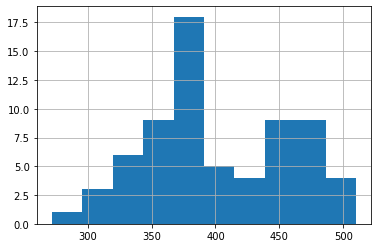

In [64]:
#histograma homicídios doloso

df_ultimosanos.hom_doloso.hist();

É posível observar que em mais de 17 meses o número de homicídios do tipo doloso ficou entre 350 e 400 por mês.

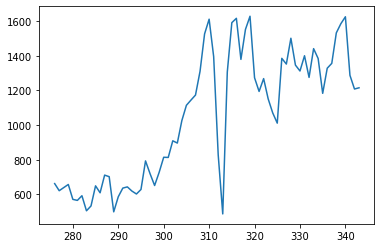

In [65]:
#gráfico de linhas roubo em coletivo

df_ultimosanos.roubo_em_coletivo.plot.line();

O gráfico de linhas explana que houve um momento onde o roubo em coletivo teve uma queda brusca e depois subiu novamente. Esse momento é analisado mais detalhadamente. 

In [67]:
df_ultimosanos.sort_values(by=['roubo_em_coletivo']).head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
313,2017,2,503,4.0,26,85.0,452,2521,324.0,170.0,848.0,277,49,4286,452,2260,487,0,4.0,551.0,3.0,11.0,4.0,1330,9714,1310,663,167.0,527.0,39.0,3089,5795,0.0,49.0,8.0,717.0,1266,372.0,808.0,120.0,2307,2396.0,535.0,882.0,82.0,1409.0,236.0,39,1.0,1.0,0.0,618,3298,4286,31231.0,3
289,2015,2,326,8.0,10,83.0,479,6757,346.0,134.0,2966.0,562,78,2494,507,6421,499,3,4.0,906.0,10.0,136.0,0.0,1253,12873,1334,4975,776.0,1854.0,0.0,8365,17304,0.0,124.0,14.0,2378.0,2334,1048.0,1078.0,246.0,1969,2809.0,903.0,1431.0,57.0,6135.0,500.0,43,2.0,1.0,0.0,427,7826,2494,65058.0,3
283,2014,8,373,4.0,9,45.0,419,6250,450.0,185.0,3964.0,546,104,2411,448,6715,505,3,2.0,748.0,5.0,110.0,0.0,916,12513,1493,2364,970.0,1184.0,0.0,7670,13681,0.0,139.0,7.0,2871.0,2436,1113.0,1077.0,289.0,1995,2846.0,913.0,1674.0,52.0,6609.0,493.0,38,3.0,2.0,0.0,431,7968,2411,65097.0,3
284,2014,9,345,4.0,7,49.0,528,6884,482.0,153.0,4112.0,512,76,2270,481,6478,533,1,6.0,759.0,2.0,114.0,0.0,885,12117,1341,2566,945.0,1302.0,0.0,7828,13982,0.0,152.0,9.0,3000.0,2480,1134.0,1122.0,280.0,1951,2862.0,942.0,2314.0,77.0,7125.0,510.0,55,2.0,1.0,0.0,405,7770,2270,67511.0,3
281,2014,6,377,1.0,18,45.0,503,7229,429.0,185.0,3831.0,649,104,2635,386,6716,565,0,2.0,616.0,6.0,88.0,0.0,1046,12813,1391,2952,782.0,1198.0,0.0,8738,15061,0.0,134.0,13.0,2793.0,2040,923.0,912.0,235.0,2003,2704.0,735.0,1511.0,59.0,6843.0,447.0,25,3.0,2.0,0.0,441,7897,2635,65397.0,3


O momento da queda ocorreu em fevereiro de 2017. O Instituto de Segurança Pública (ISP), [divugou](https://g1.globo.com/rio-de-janeiro/noticia/rio-teve-243-mais-homicidios-em-fevereiro-diz-isp.ghtml) os dados referentes aos meses de janeiro e fevereiro de 2017, e informou que algumas atividades da Polícia Civil ficaram paralisadas nesse período, e por isso houve uma subnotificação de alguns crimes, impossibilitando análises com bases nesses dados referentes a esses meses. Isso explica a queda brusca desse delito nesse período.

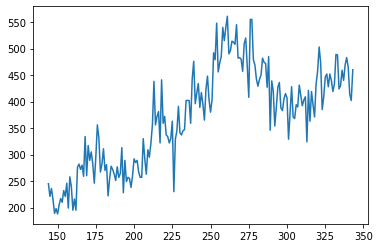

In [68]:
#gráfico de linhas estupro

df_violenciaestupro.estupro.plot.line();

É possível visualizar no gráfico que o realmente houve um aumento do número de registro de estupros, como já havia sido observado anteriormente.

## Conclusão

A análise desse dataset foi interessante, pois, ele possui data de início de registro diferente para os delitos notificados, o que pôde gerar uma análise mais real, visto que nem sempre um dataset virá de forma limpa e organizada, pronta para análise. Importante ressaltar que entre o período de início e fim dos registros também podem ocorrer falhas - como foi o caso das subnotificações no início de 2017.